In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

tips_dataframe = sns.load_dataset("tips")
tips_dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [50]:
# 데이터의 정보와 요약통계를 확인하라

tips_dataframe.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
tips_dataframe.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [23]:
tips_dataframe.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [52]:
tips_dataframe.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [25]:
tips_dataframe.isnull().sum().sum()

0

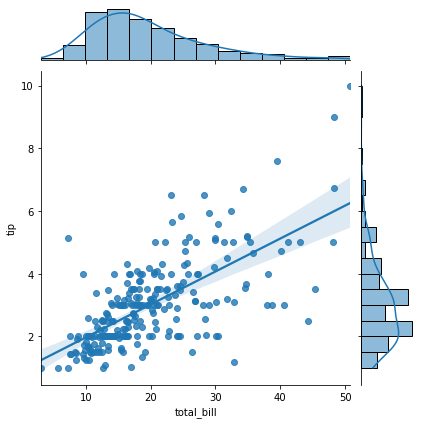

In [54]:
# 계산 금액과 팁 금액 사이에 어떠한 상관 관계가 있을 것 같다. 
# 두 변수의 관계를 시각화하여 나타내고, 선형적 관계가 보이는지 회귀선까지 그어서 표시해라.

sns.jointplot(x = "total_bill", y = "tip", kind = 'reg', data = tips_dataframe)

In [55]:
# total_bill과 tip의 상관관계는 67.5% 정도 있음

tips_dataframe.corr() 

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:xlabel='day', ylabel='count'>

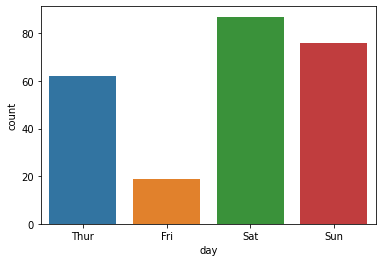

In [56]:
# 요일별로 팁의 발생 횟수가 어떻게 다른지를 시각화해서 나타내어 보아라. (Countplot 활용)

sns.countplot(x = "day", data = tips_dataframe)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

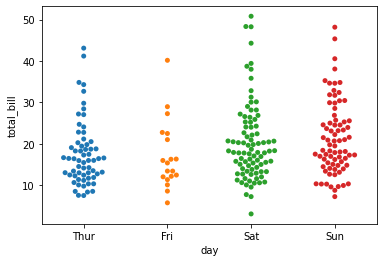

In [57]:
# 요일별 계산금액의 통계적 분포를 한눈에 보고싶다. 시각화해서 나타내어 보아라.

sns.swarmplot(x = "day", y = "total_bill", data = tips_dataframe)

<AxesSubplot:xlabel='size', ylabel='sex'>

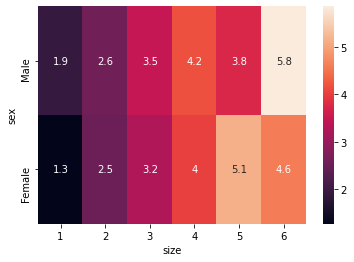

In [69]:
# 계산자의 성별에 따라서 테이블 인원수, 팁 금액, 계산금액이 어떠한 관계가 있는지 한눈에 알 수 있도록 시각화하라.

# 한 번에 나누고 싶었는데, 도저히 안돼서 두 번으로 나눠서 시각화 했습니다. 
# (문제의 목적과 안맞는 것 같음 / 해답 참고하여 피드백 받겠음)

pivot = tips_dataframe.pivot_table(index = 'sex', columns = 'size', values = 'tip')
pivot

sns.heatmap(pivot, annot = True)

<AxesSubplot:xlabel='size', ylabel='sex'>

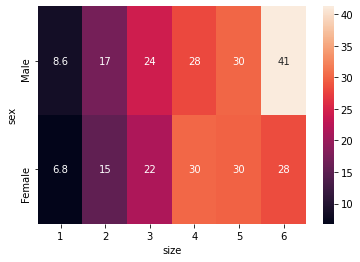

In [70]:
# tip같은 경우 5명일 때 빼고, 비교적 남자의 tip 금액이 많았음
# 전체 금액은 4명일 때 빼고, 비교적 남자의 전체 금액이 많았음 

pivot = tips_dataframe.pivot_table(index = 'sex', columns = 'size', values = 'total_bill')
pivot

sns.heatmap(pivot, annot = True)

## 얻어낸 인사이트로 음식점의 매출액 혹은 팁 금액을 증대시키기 위한 방안

total_bill : 1. 금요일의 주문 금액이 목요일에 비해 비교적 낮은 점을 고려해, 원인이 무엇인지 파악해야 할 필요성 보임 (목, 금은 디너만 운영)
             2. 주말의 경우 낮은 금액의 주문의 분포가 비교적 높음. 낮은 가격의 음식들에 대한 재료를 비교적 더 준비해놓으면, 재고 비용이 줄어들 가능성이 있을것으로 판단됨.

tip : 1. 주문을 많이 한 고객일수록, tip을 더 주는 경향이 있는 것으로 보임. 따라서 주문 금액만큼 서비스에 조금의 차별화를 두어, 팁 금액을 더 증대시킬 수 있도록 운영
      2. 테이블 6명 남성의 경우, 여성의 테이블보다 주문 금액 / 팁 금액이 월등히 높았음. 해당 원인이 남녀의 심리적 차이뿐인지 파악 필요